In [1]:
#读取data/physics_data.npz
import numpy as np
import matplotlib.pyplot as plt
file = np.load('../data/physics_data.npz')
physics_data = file['physics_data']
physics_data

/home/mingzhuo/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


array([(4.39337, 7.8336 , 3.0853443, 5.8696556),
       (3.81   , 7.86787, 2.932526 , 4.6742306),
       (4.72838, 8.4689 , 2.6689627, 5.993018 ), ...,
       (4.9176 , 7.71446, 3.5856001, 5.8065925),
       (5.79654, 8.25297, 2.6292233, 4.1185813),
       (1.43829, 8.04153, 4.166867 , 5.992517 )],
      shape=(794335,), dtype=[('energy_prompt_MeV', '<f4'), ('energy_delayed_MeV', '<f4'), ('log_time_diff_us', '<f4'), ('log_vertex_distance_mm', '<f4')])

# 初步处理

In [2]:
ene_p_MeV=physics_data['energy_prompt_MeV']
ene_d_MeV=physics_data['energy_delayed_MeV']
log_time_dff_us=physics_data['log_time_diff_us']
log_vertex_distance_mm=physics_data['log_vertex_distance_mm']

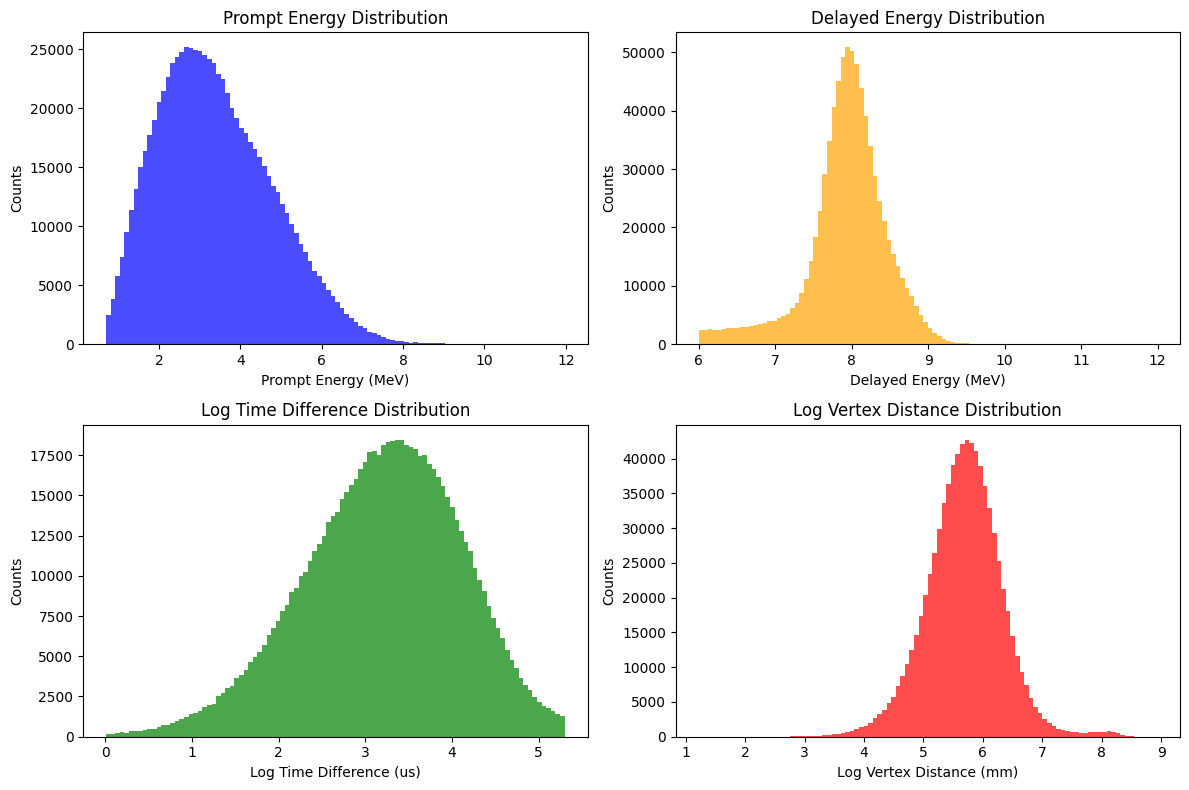

In [3]:
#画出四个直方图
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(ene_p_MeV, bins=100, color='blue', alpha=0.7)
plt.xlabel('Prompt Energy (MeV)')
plt.ylabel('Counts')
plt.title('Prompt Energy Distribution') 
plt.subplot(2, 2, 2)
plt.hist(ene_d_MeV, bins=100, color='orange', alpha=0.7)
plt.xlabel('Delayed Energy (MeV)')
plt.ylabel('Counts')
plt.title('Delayed Energy Distribution')
plt.subplot(2, 2, 3)
plt.hist(log_time_dff_us, bins=100, color='green', alpha=0.7)
plt.xlabel('Log Time Difference (us)')
plt.ylabel('Counts')
plt.title('Log Time Difference Distribution')
plt.subplot(2, 2, 4)
plt.hist(log_vertex_distance_mm, bins=100, color='red', alpha=0.7)
plt.xlabel('Log Vertex Distance (mm)')
plt.ylabel('Counts')
plt.title('Log Vertex Distance Distribution')
plt.tight_layout()
plt.show()

# Encoder学出的主值

In [4]:
pri_value=np.load("../data/latent_repr.npz")
pri_value.keys()

KeysView(NpzFile '../data/latent_repr.npz' with keys: latent, original_features, scaled_features, feature_names, latent_dim)

In [5]:
latent=pri_value['latent']
latent.shape

(794335, 3)

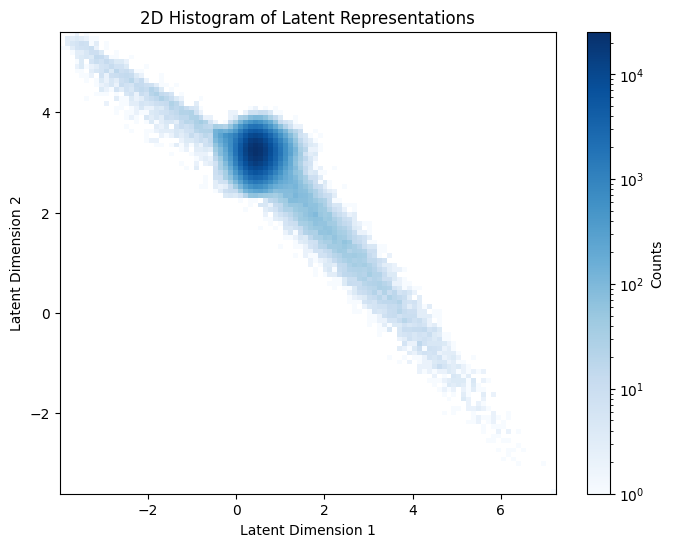

In [6]:
z1=latent[:,0]
z2=latent[:,1]
z3=latent[:,2]
plt.figure(figsize=(8, 6))
from matplotlib.colors import LogNorm
plt.hist2d(z1, z2, bins=100, cmap='Blues',norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Histogram of Latent Representations')
plt.show()

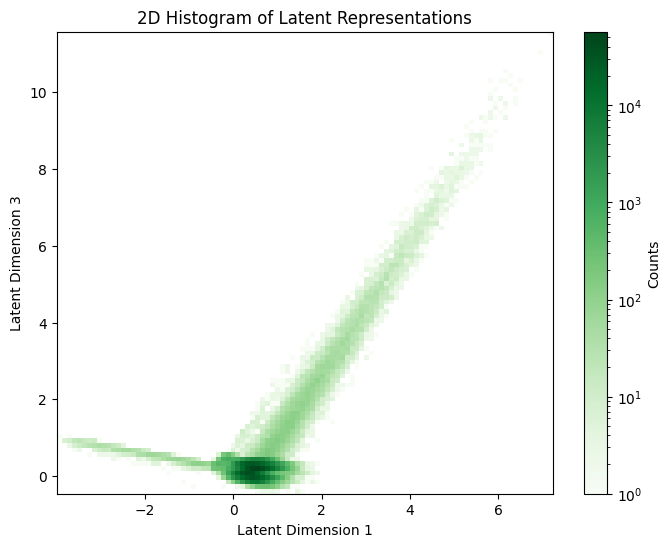

In [7]:
#z1 vs z3
plt.figure(figsize=(8, 6))
plt.hist2d(z1, z3, bins=100, cmap='Greens',norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 3')
plt.title('2D Histogram of Latent Representations')
plt.show()

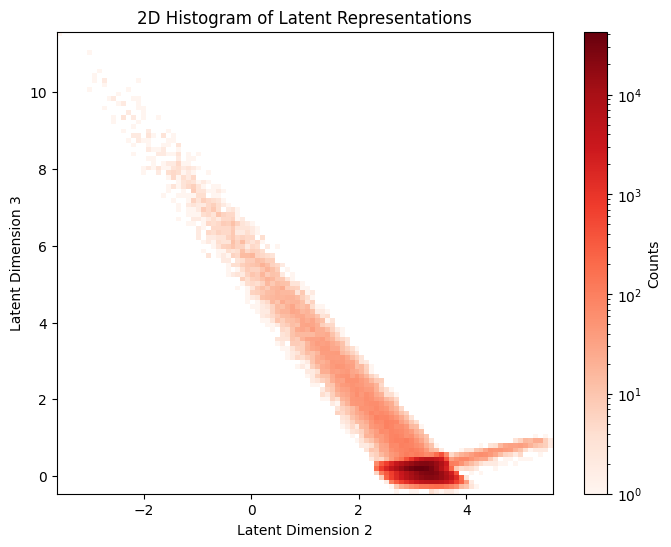

In [8]:
#z2 vs z3
plt.figure(figsize=(8, 6))
plt.hist2d(z2, z3, bins=100, cmap='Reds',norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Latent Dimension 2')
plt.ylabel('Latent Dimension 3')
plt.title('2D Histogram of Latent Representations')
plt.show()

In [9]:
#3d scatter plot

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z1, z2, z3, c='purple', alpha=0.5, s=1)
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Scatter Plot of Latent Representations')
plt.show()  

ModuleNotFoundError: No module named 'matplotlib.tri.triangulation'

# GMM clustering

In [19]:
#读取data/gmm_clusters.npz
gmm_data=np.load("../data/gmm_clusters.npz")
gmm_data.keys()

KeysView(NpzFile '../data/gmm_clusters.npz' with keys: latent, latent_scaled, labels, probabilities, means...)

In [20]:
#读取椭圆参数
means=gmm_data['means']
covariances=gmm_data['covariances']
weights=gmm_data['weights']
print("Means:",means)

Means: [[-1.106886    0.6155406   0.27028528]
 [ 3.945979   -3.897363    5.3674374 ]
 [-0.0515516   0.06146713 -0.10934449]]


In [21]:
print("covariances:",covariances)

covariances: [[[ 7.2168388e+00 -2.9759269e+00 -8.0622131e-01]
  [-2.9759269e+00  1.7060846e+00  3.5245147e-01]
  [-8.0622131e-01  3.5245147e-01  1.7929450e-01]]

 [[ 8.8689070e+00 -8.8294020e+00  1.2135996e+01]
  [-8.8294020e+00  9.7559519e+00 -1.2700271e+01]
  [ 1.2135996e+01 -1.2700271e+01  1.7510162e+01]]

 [[ 3.7681651e-01 -1.0317957e-02  2.6465690e-02]
  [-1.0317955e-02  5.0637197e-01 -6.4067587e-02]
  [ 2.6465690e-02 -6.4067587e-02  1.2636827e-01]]]


In [22]:
print("Weights:",weights)

Weights: [0.02120907 0.01849497 0.960296  ]


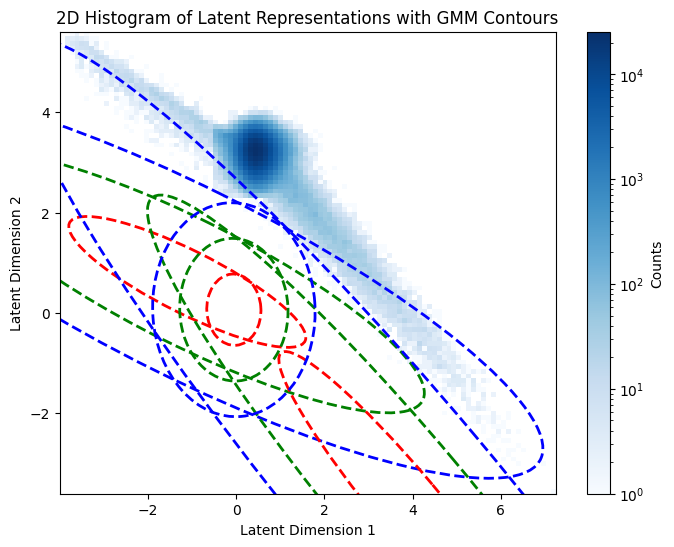

In [ ]:
#画z1,z2的等高线，并标出椭圆
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 

means=means[:, 0:2]
covariances=covariances[:, 0:2, 0:2]
def plot_gmm_contours(means, covariances, ax):
    for mean, cov in zip(means, covariances):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        vals = vals[order]
        vecs = vecs[:, order]
        angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        colorlist=['red','green','blue','orange','purple']
        for n_std in range(1, 4):
            width, height = 2 * n_std * np.sqrt(vals)
            ellip = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=colorlist[n_std-1], fc='None', lw=2, ls='--')
            ax.add_patch(ellip)
plt.figure(figsize=(8, 6))
from matplotlib.colors import LogNorm
plt.hist2d(z1, z2, bins=100, cmap='Blues',norm=LogNorm())
plt.colorbar(label='Counts')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Histogram of Latent Representations with GMM Contours')
ax = plt.gca()
plot_gmm_contours(means, covariances, ax)
plt.show()